0.6578947368421053
[1 2 1 2 0 2 2 2 2 1 2 1 0 0 2 2 0 2 2 2 2 0 2 0 2 2 0 2 2 2 0 0 2 0 1 2 2
 2]


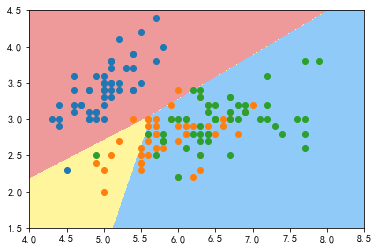

In [1]:
'''一、多分类拆分策略：一对一(OVO)、一对其余(OVR)
code：
  1,OVR:LogisticRegression()默认使用OvR；
  2,ovo'''

# 1,OVR: LogisticRegression()默认使用OvR
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")  # 屏蔽警告


iris = datasets.load_iris()
X = iris.data[:,0:2]   # 取出花萼的长和宽 
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

log_reg_ovr = LogisticRegression(multi_class='ovr')
log_reg_ovr.fit(X_train, y_train)
score_ovr = log_reg_ovr.score(X_test, y_test)
print(score_ovr)
y_predict = log_reg_ovr.predict(X_test)
print(y_predict)


def plot_decision_boundary(model, axis):  # 绘制决策边界  
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)    
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

plot_decision_boundary(log_reg_ovr, axis=[4, 8.5, 1.5, 4.5])
plt.scatter(X[y==0, 0], X[y==0, 1])  # 可视化时只能在同一个二维平面内体现两种特征
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

0.7894736842105263


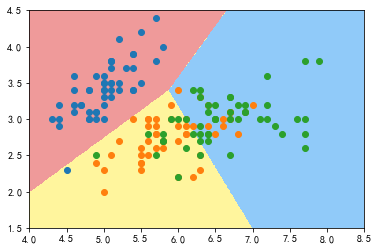

In [2]:
# 2,OVO：
log_reg_ovo = LogisticRegression(multi_class='multinomial', solver='newton-cg')  # multinomial：指 OvO 方法
log_reg_ovo.fit(X_train, y_train)
score_ovo = log_reg_ovo.score(X_test, y_test)
print(score_ovo)

plot_decision_boundary(log_reg_ovo, axis=[4, 8.5, 1.5, 4.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

In [3]:
'''二、算法分类：单标签二分类算法、单标签多分类算法、多标签算法
code： 
  1,OVO； 
  2,OVR；
  3,Error-Correcting:纠错码机制；
  4,多标签分类。'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_multilabel_classification
from sklearn.svm import SVC
from sklearn.preprocessing import LabelBinarizer
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA

iris = datasets.load_iris()  # 加载数据
X, y = iris.data, iris.target  # 获取X和y

# 1,OVO:
clf = OneVsOneClassifier(LinearSVC(random_state=0))  # 模型构建
clf.fit(X, y)  # 模型训练

OneVsOneClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0),
          n_jobs=None)

In [4]:
# 2,OVR:
clf = OneVsRestClassifier(LinearSVC(random_state=0)) # 模型构建
clf.fit(X, y)

OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0),
          n_jobs=None)

In [5]:
# 3,Error-Correcting:纠错码机制
clf = OutputCodeClassifier(LinearSVC(random_state=0), code_size=2, random_state=0)  # code_size: 指定最终使用多少个子模型，实际的子模型的数量=code_size*label_number
clf.fit(X, y)            # 模型构建
print(clf.predict(X))    # 输出预测结果值
print("准确率:%.3f" % accuracy_score(y, clf.predict(X)))

k = 1
for item in clf.estimators_:  # 模型属性输出
    print("第%d个模型:" % k, end="")
    print(item)
    k += 1
print(clf.classes_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
准确率:0.927
第1个模型:LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)
第2个模型:_ConstantPredictor()
第3个模型:LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)
第4个模型:LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)
第5个

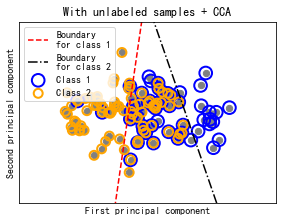

In [6]:
# 4,多标签分类：
def plot_hyperplane(clf, min_x, max_x, linestyle, label):
    # 画图
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(min_x - 5, max_x + 5)  
    yy = a * xx - (clf.intercept_[0]) / w[1]
    plt.plot(xx, yy, linestyle, label=label)

def plot_subfigure(X, Y, subplot, title):    # 将X进行降维操作，变成两维的数据
    X = PCA(n_components=2).fit_transform(X)
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])

    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])

    classif = OneVsRestClassifier(SVC(kernel='linear'))
    classif.fit(X, Y)

    plt.subplot(2, 2, subplot)
    plt.title(title)

    zero_class = np.where(Y[:, 0])
    one_class = np.where(Y[:, 1])
    plt.scatter(X[:, 0], X[:, 1], s=40, c='gray')
    plt.scatter(X[zero_class, 0], X[zero_class, 1], s=160, edgecolors='b',
               facecolors='none', linewidths=2, label='Class 1')
    plt.scatter(X[one_class, 0], X[one_class, 1], s=80, edgecolors='orange',
               facecolors='none', linewidths=2, label='Class 2')

    plot_hyperplane(classif.estimators_[0], min_x, max_x, 'r--',
                    'Boundary\nfor class 1')
    plot_hyperplane(classif.estimators_[1], min_x, max_x, 'k-.',
                    'Boundary\nfor class 2')
    plt.xticks(())
    plt.yticks(())

    plt.xlim(min_x - .5 * max_x, max_x + .5 * max_x)
    plt.ylim(min_y - .5 * max_y, max_y + .5 * max_y)
    if subplot == 1:
        plt.xlabel('First principal component')
        plt.ylabel('Second principal component')
        plt.legend(loc="upper left")


plt.figure(figsize=(8, 6))

X, Y = make_multilabel_classification(n_classes=2, n_labels=1,
                                      allow_unlabeled=False, # 该参数控制是否有类别缺省的数据，False表示没有
                                      random_state=1)

plot_subfigure(X, Y, 1, "With unlabeled samples + CCA")

plt.subplots_adjust(.04, .02, .97, .94, .09, .2)
plt.show()

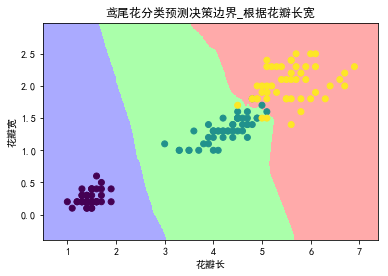

In [9]:
# 三、iris数据集绘制决策边界：
# 1，x轴y轴分别为花瓣的长和宽，即使用花瓣测量数据绘制 2D散点图，并绘出决策边界
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
 
#matplot显示图例中的中文问题 :   https://www.zhihu.com/question/25404709/answer/67672003
import matplotlib.font_manager as fm
#mac中的字体问题请看: https://zhidao.baidu.com/question/161361596.html
#myfont = fm.FontProperties(fname='/Library/Fonts/Xingkai.ttc')
 
iris=datasets.load_iris()
x=iris.data[:,2:4]   #取出花瓣的长和宽 
y=iris.target       #取出类别
 
#计算散点图的轴的边界
x_min,x_max=x[:,0].min() -.5, x[:,0].max()+.5
y_min, y_max=x[:,1].min()-.5, x[:,1].max()+.5
 
#绘制边界
cmap_light=ListedColormap(['#AAAAFF','#AAFFAA','#FFAAAA'])
h=.02
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
 
knn=KNeighborsClassifier()
knn.fit(x,y)
Z=knn.predict( np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,Z,cmap=cmap_light)
 
plt.title(u'鸢尾花分类预测决策边界_根据花瓣长宽')
plt.xlabel(u'花瓣长')
plt.ylabel(u'花瓣宽')
 
plt.scatter(x[:,0],x[:,1],c=y)
plt.xlim( xx.min(), xx.max() )
plt.ylim( yy.min(),yy.max() )
 
 
plt.savefig('../OutPut/iris数据集绘制决策边界的2D散点图_根据花瓣数据绘制.png')
plt.show()

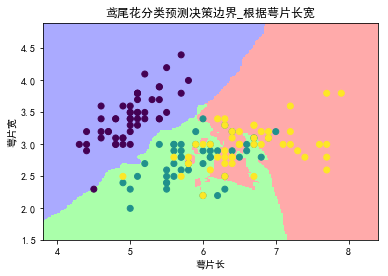

In [10]:
# 2，x轴y轴分别为花萼的长和宽，即使用花萼测量数据绘制 2D散点图，并绘出决策边界
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
 
#matplot显示图例中的中文问题 :   https://www.zhihu.com/question/25404709/answer/67672003
import matplotlib.font_manager as fm
#mac中的字体问题请看: https://zhidao.baidu.com/question/161361596.html
#myfont = fm.FontProperties(fname='/Library/Fonts/Xingkai.ttc')
 
iris=datasets.load_iris()
x=iris.data[:,:2]   #取出萼片的长和宽 
y=iris.target       #取出类别
 
#计算散点图的轴的边界
x_min,x_max=x[:,0].min() -.5, x[:,0].max()+.5
y_min, y_max=x[:,1].min()-.5, x[:,1].max()+.5
 
#绘制边界
cmap_light=ListedColormap(['#AAAAFF','#AAFFAA','#FFAAAA'])
h=.02
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
 
knn=KNeighborsClassifier()
knn.fit(x,y)
Z=knn.predict( np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,Z,cmap=cmap_light)
 
plt.title(u'鸢尾花分类预测决策边界_根据萼片长宽')
plt.xlabel(u'萼片长')
plt.ylabel(u'萼片宽')
 
plt.scatter(x[:,0],x[:,1],c=y)
plt.xlim( xx.min(), xx.max() )
plt.ylim( yy.min(),yy.max() )
 
 
plt.savefig('../OutPut/iris数据集绘制决策边界的2D散点图_根据萼片数据绘制.png')
plt.show()